# Lesson 37: Machine Learning -Numpy -  Linear Regression - Simple Example

To consider any problem in Machine Learning we will need 4 ingredients:
- data (here we generate them randomly)
- model (linear regression in case of supervised learning: y = wx +b)
- objective function (for superwised learnign it is a loss function, and for linear regression it is l2-norm)
- optimization algorithm (here gradient descent)

In case of supervised ML we need inputs (x variables) and targets as given values. The model (weights and biases) and outputs will be generated by our machine (computer).

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The last library allows for making 3D plots.

 

## Generate random input data to train on

In [2]:
observations = 1000

# We will have two independent variables:

xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
zs = np.random.uniform(low = -10, high = 10, size = (observations, 1))

# We combine the generated variables (arrays) into one matrix:

inputs = np.column_stack((xs, zs))

# Let us check the dimensionality of the matrix:

print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

Targets will be characterized by a function: $f(x,z) = 2x - 3z + 5 + noise $. $noise$ is added to make the created targets a bit more distracted, so it will be some random numbers.

In [3]:
noise = np.random.uniform(-1, 1, (observations, 1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)
xs.shape

(1000, 1)


(1000, 1)

## Plot the training data

The point is to see the trend: we remember that our model should learn to reproduce the trend.

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(xs, zs, targets)
ax.set_xlabel("xs")
ax.set_ylabel("zs")
ax.set_zlabel("targets")
ax.view_init(azim = 20)
plt.show()

ValueError: input operand has more dimensions than allowed by the axis remapping

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f86985dcd40> (for post_execute):


AttributeError: 'Line3D' object has no attribute '_verts3d'

AttributeError: 'Line3D' object has no attribute '_verts3d'

<Figure size 432x288 with 1 Axes>

## Model creation - initialize varibles

In [5]:
# Our initial weights and biases will be chosen randomly from the intrval [-0.1, 0.1]:

init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size = (2,1))
biases = np.random.uniform(-init_range, init_range, size = 1)

print(weights, biases)

[[0.09375701]
 [0.05069918]] [-0.01704329]


## Model optimization - set a learning rate

In [6]:
learning_rate = 0.05

## Train the model - Vary weights and biases to make outputs closest to targets

We need to minimize the loss function for weights and biases

In [7]:
for i in range(200):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas**2)/2/observations
    
    # We need to see that the loss is decreasing
    print(loss)
    
    deltas_scaled = deltas/observations
    
    # ".T" - means transposed
    weights = weights - learning_rate*np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate*np.sum(deltas_scaled)

225.7609899872868
96.18711975193146
44.19010171062712
22.950433049663495
13.968589567480777
9.91496314568666
7.874693022454811
6.682284407029634
5.867702506743695
5.238573209621406
4.714029075811386
4.258372013885057
3.8544565405546334
3.492940920076995
3.1679073257733106
2.875053215900571
2.6109282705100147
2.3726005320492605
2.157501059893869
1.9633443036619183
1.788081617651435
1.6298700487277988
1.4870487620799615
1.3581197519608976
1.241731300727356
1.1366634328660774
1.0418149566484254
0.9561918443139461
0.8788967781158472
0.8091197295830768
0.7461294626998676
0.6892658670778737
0.6379330385054159
0.5915930332983026
0.5497602305004635
0.5119962426163317
0.4779053214295345
0.4471302107095738
0.4193484023192819
0.3942687564766602
0.37162845074718653
0.35119022579072057
0.33273989899840145
0.31608411996302405
0.3010483442610031
0.2874750043119916
0.27522185814759176
0.26416049878501746
0.25417500858466424
0.24516074448989372
0.237023241418947
0.22967722231705526
0.2230457044945887
0

## Print weights and biases after optimization

In [8]:
print(weights, biases)

[[ 2.00036515]
 [-2.99842673]] [5.02067149]


## Plot last targets vs outputs

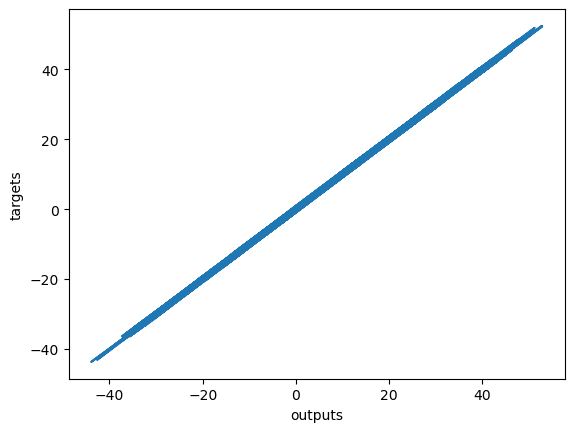

In [9]:
plt.plot(outputs, targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()